In [3]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

# Load IBM Q account and get the least busy backend device
provider = IBMQ.load_account()
# provider = IBMQ.get_provider("ibm-q")
provider = IBMQ.get_provider(hub='ibm-q-education', group='yale-uni-2', project='cpsc647-quantum')
# device = provider.get_backend('ibmq_lima') #run on ibmq_lima (5-qbit QC)

In [4]:
device_names =  ['ibmq_lima', 'ibmq_bogota', 'ibmq_santiago', 'ibmq_manila', 'ibmq_quito', 'ibmq_belem', 'ibmq_casablanca', 'ibmq_jakarta', 'ibm_lagos', 'ibm_perth'  ]
# device_names =  ['ibmq_lima', 'ibmq_bogota', 'ibmq_santiago', 'ibmq_manila', 'ibmq_quito', 'ibmq_belem']
device = [0]*len(device_names)
for i in range(len(device_names)):
    device[i] = provider.get_backend(device_names[i])
    print("Device", i , "=", device[i])


Device 0 = ibmq_lima
Device 1 = ibmq_bogota
Device 2 = ibmq_santiago
Device 3 = ibmq_manila
Device 4 = ibmq_quito
Device 5 = ibmq_belem
Device 6 = ibmq_casablanca
Device 7 = ibmq_jakarta
Device 8 = ibm_lagos
Device 9 = ibm_perth


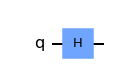

In [53]:
from qiskit import QuantumCircuit

circ = QuantumCircuit(1)
# circ.cx(0, 1)
# circ.h(0)
# circ.delay(0)
for i in range(1):
    circ.h(0)
#     circ.delay(0)

# circ.cx(0, 1)
# circ.cx(1, 0)
# circ.cx(0, 1)
# circ.delay(0, qarg = 0)
# circ.cx(0, 1)
# circ.cx(1, 2)
# circ.cx(2, 3)
# circ.delay(0, qarg = 3)

# circ.cx(2, 3)
# circ.cx(1, 2)
# circ.cx(0, 1)
# circ.delay(0, qarg = 0)

# circ.measure([0, 1], [0, 1])

circ.draw("mpl")

In [54]:
from qiskit import transpile, schedule as build_schedule

backend = device[0]

transpiled_circ = transpile(circ, backend)  # Undefined Hadamard is replaced by U1
schedule = build_schedule(transpiled_circ, backend)

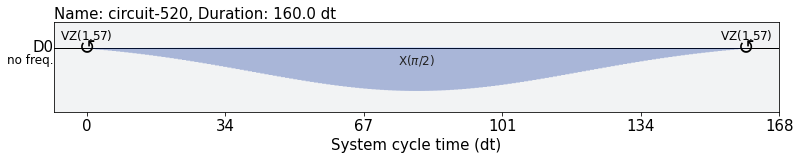

In [55]:
schedule.draw()

In [51]:
circ.draw('latex_source', filename='./file.tex')
!pdflatex file.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.23 (MiKTeX 21.10)
entering extended mode
(file.tex
LaTeX2e <2021-06-01> patch level 1
L3 programming layer <2021-10-12>
(C:\Users\sd982\AppData\Local\Programs\MiKTeX\tex/latex/standalone\standalone.c
ls
Document Class: standalone 2018/03/26 v1.3a Class to compile TeX sub-files stan
dalone
(C:\Users\sd982\AppData\Local\Programs\MiKTeX\tex/latex/tools\shellesc.sty)
(C:\Users\sd982\AppData\Local\Programs\MiKTeX\tex/generic/iftex\ifluatex.sty
(C:\Users\sd982\AppData\Local\Programs\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\sd982\AppData\Local\Programs\MiKTeX\tex/latex/xkeyval\xkeyval.sty
(C:\Users\sd982\AppData\Local\Programs\MiKTeX\tex/generic/xkeyval\xkeyval.tex
(C:\Users\sd982\AppData\Local\Programs\MiKTeX\tex/generic/xkeyval\xkvutils.tex
(C:\Users\sd982\AppData\Local\Programs\MiKTeX\tex/generic/xkeyval\keyval.tex)))
)
(C:\Users\sd982\AppData\Local\Programs\MiKTeX\tex/latex/standalone\standalone.c
fg) (C:\Users\sd982\AppData\Local\Program

# Duration Analysis - Bernstein Vazarani

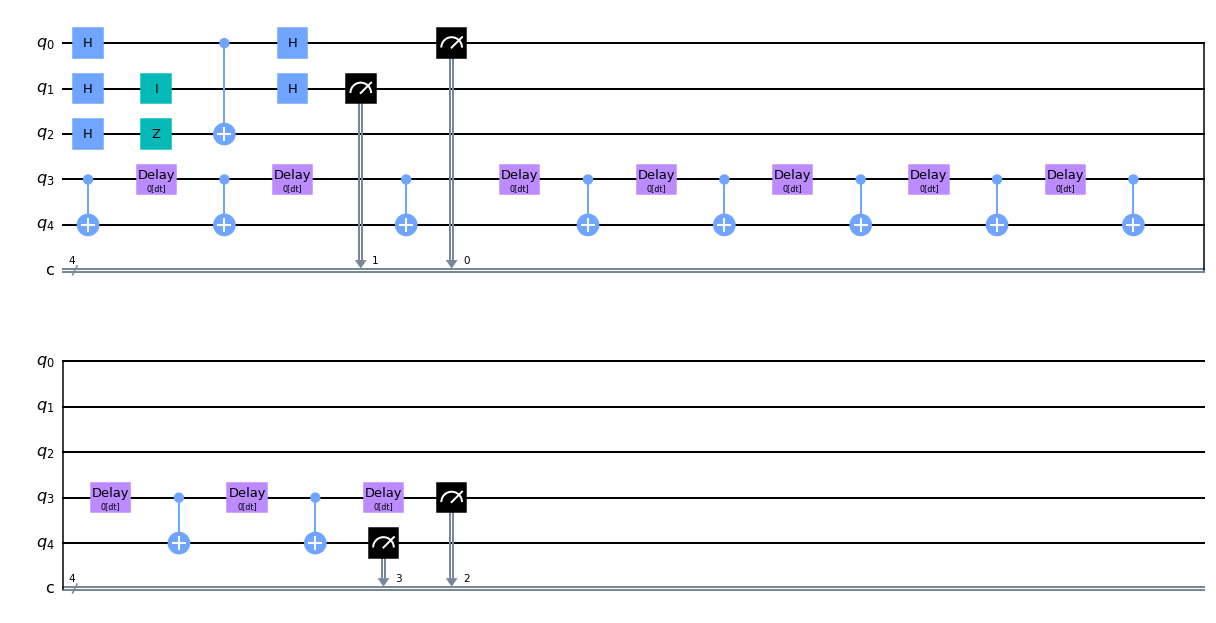

In [40]:
def bv_mal(copies):
    s = '01'
    n = 2
    # We need a circuit with n qubits, plus one auxiliary qubit
    # Also need n classical bits to write the output to
#     bv_circuit = QuantumCircuit(n+1, n)
    bv_circuit = QuantumCircuit(5, 4)

    # put auxiliary in state |->
    bv_circuit.h(n)
    bv_circuit.z(n)

    # Apply Hadamard gates before querying the oracle
    for i in range(n):
        bv_circuit.h(i)

    # Apply barrier 
#     bv_circuit.barrier()

    # Apply the inner-product oracle
    s = s[::-1] # reverse s to fit qiskit's qubit ordering
    for q in range(n):
        if s[q] == '0':
            bv_circuit.i(q)
        else:
            bv_circuit.cx(q, n)

    # Apply barrier 
#     bv_circuit.barrier()

    #Apply Hadamard gates after querying the oracle
    for i in range(n):
        bv_circuit.h(i)
    
    for i in range(copies):
#         bv_circuit.z(3)
        bv_circuit.cx(3,4)
#         bv_circuit.h(3)
        bv_circuit.delay(0, qarg = 3)
#         bv_circuit.h(3)
#         bv_circuit.delay(0, qarg = 3)
#         bv_circuit.cx(4,3)
#         bv_circuit.delay(0, qarg = 3)

#         if i%2==1:
#             bv_circuit.cx(4,3)
#             bv_circuit.cx(5,4)
#             bv_circuit.cx(6,5)
#             bv_circuit.delay(0, qarg = 6)
#         else:
#             bv_circuit.cx(6,5)
#             bv_circuit.cx(5,4)
#             bv_circuit.cx(4,3)
#             bv_circuit.delay(0, qarg = 3)

    # Measurement
#     for i in range(n):
#         bv_circuit.measure(i, i)
    bv_circuit.measure(0, 0)
    bv_circuit.measure(1, 1)
    bv_circuit.measure(3, 2)
    bv_circuit.measure(4, 3)
    
    return bv_circuit 

bv_circuit = bv_mal(10)
bv_circuit.draw('mpl')

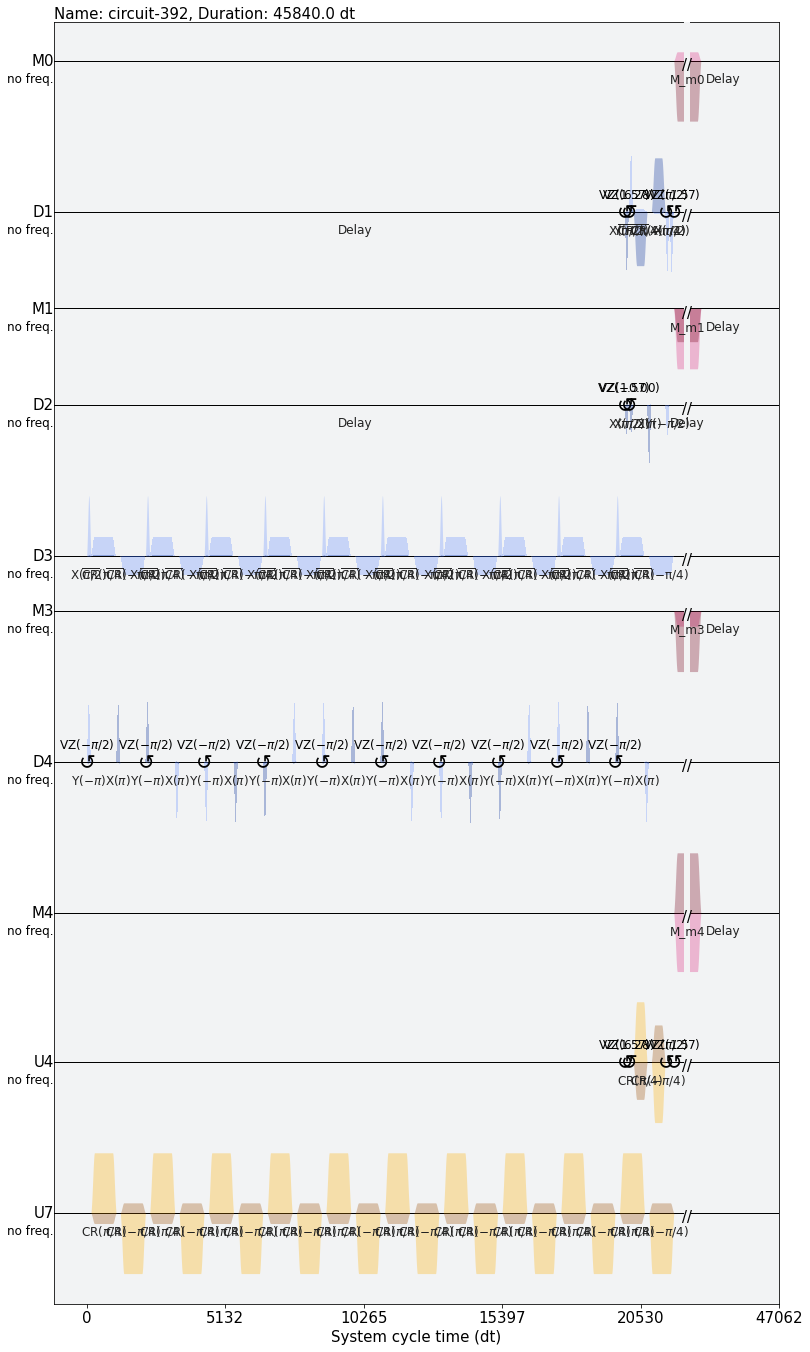

In [41]:
from qiskit import transpile, schedule as build_schedule

backend = device[0]
transpiled_bv = transpile(bv_circuit, backend, optimization_level=3, scheduling_method='alap')  # Undefined Hadamard is replaced by U1
schedule = build_schedule(transpiled_bv, backend)
schedule.draw()

# Duration Analysis - Deutsch Josza

In [32]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate


def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    
#     for i in range(n):
#         dj_circuit.measure(i, i)
    
    return dj_circuit

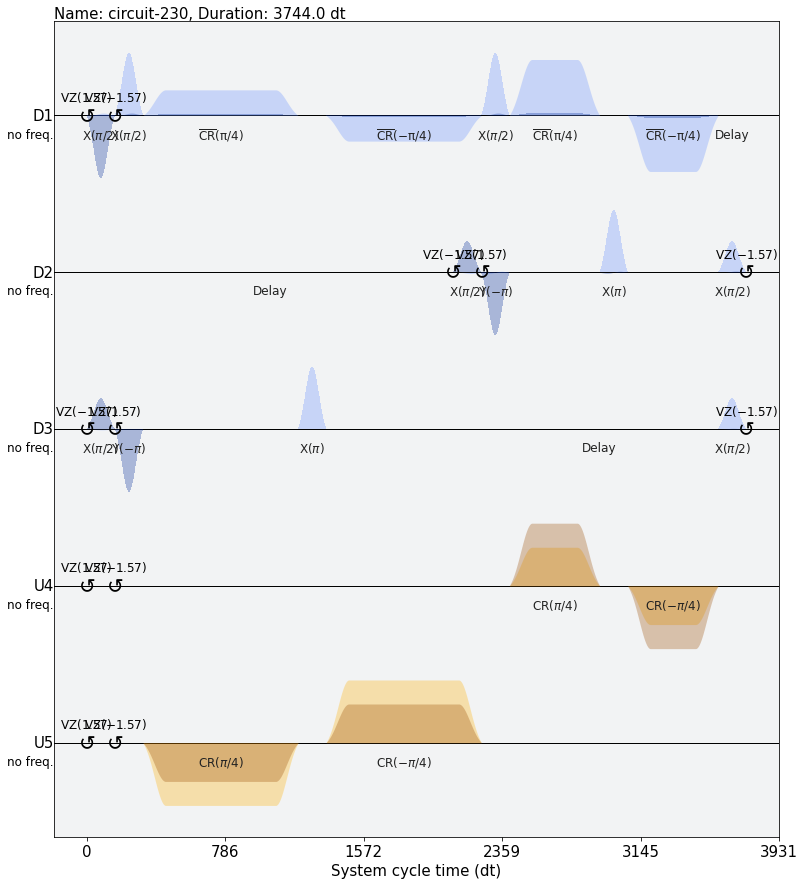

In [33]:
from qiskit import transpile, schedule as build_schedule

n=2
oracle = dj_oracle("balanced",n)
dj = dj_algorithm(oracle, n)

backend = device[0]
transpiled_dj = transpile(dj, backend, optimization_level=3, scheduling_method='alap')  # Undefined Hadamard is replaced by U1
schedule = build_schedule(transpiled_dj, backend)
schedule.draw()